In [8]:
#installing the req library

!pip install pandas matplotlib seaborn imblearn xgboost catboost 

In [ ]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


In [ ]:
#read the data head
data = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp.csv', delimiter=";")
data.head()

,index,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,1,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,2,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,3,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,4,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,5,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [17]:
#colum name and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8924 entries, 0 to 8923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   index                8924 non-null   int64
 1   cbo                  8924 non-null   int64
 2   dit                  8924 non-null   int64
 3   fanin                8924 non-null   int64
 4   fanout               8924 non-null   int64
 5   lcom                 8924 non-null   int64
 6   noc                  8924 non-null   int64
 7   loc                  8924 non-null   int64
 8   rfc                  8924 non-null   int64
 9   wmc                  8924 non-null   int64
 10  totalMethodsQty      8924 non-null   int64
 11  protectedMethodsQty  8924 non-null   int64
 12  publicMethodsQty     8924 non-null   int64
 13  privateMethodsQty    8924 non-null   int64
 14  finalFieldsQty       8924 non-null   int64
 15  protectedFieldsQty   8924 non-null   int64
 16  publicFieldsQty      892

In [ ]:
#check missing value
data.isnull().sum()

index                  0
cbo                    0
dit                    0
fanin                  0
fanout                 0
lcom                   0
noc                    0
loc                    0
rfc                    0
wmc                    0
totalMethodsQty        0
protectedMethodsQty    0
publicMethodsQty       0
privateMethodsQty      0
finalFieldsQty         0
protectedFieldsQty     0
publicFieldsQty        0
privateFieldsQty       0
bugs                   0
dtype: int64

In [ ]:
#count the data  each  class
data['bugs'].value_counts()

bugs
0    8356
1     568
Name: count, dtype: int64

In [31]:
#data preprocessing
X = data.drop(columns=['bugs'])
y = data['bugs']
data.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [39]:
#Stratyfied Splitting

from sklearn.model_selection import train_test_split

X = data.drop(columns=['bugs'])
y = data['bugs']

#Step 1: Split into training 72% and temp set 28%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.28, stratify=y, random_state=123)

#Step 2: Split the temporary set into testing 18% and tuning 10%
X_test, X_tuning, y_test, y_tuning = train_test_split(X_temp, y_temp, test_size=0.357, stratify=y_temp, random_state=123)

#Step 3: Implementing SMOTE ton the training data
smote = SMOTETomek(sampling_strategy='auto')
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()


bugs
0    5966
1    5966
Name: count, dtype: int64

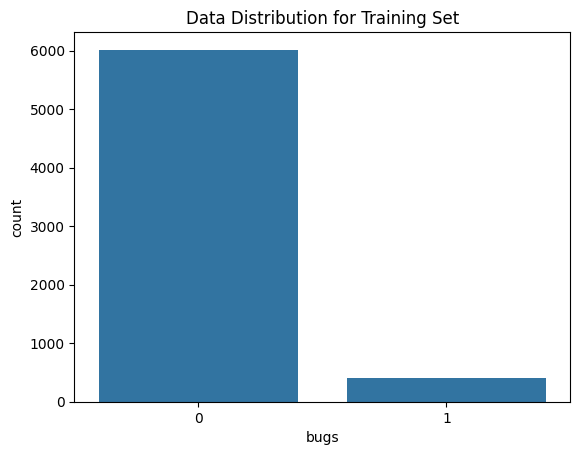

In [40]:
sns.countplot(x=y_train, data=X_train)
plt.title('Data Distribution for Training Set')
plt.show()

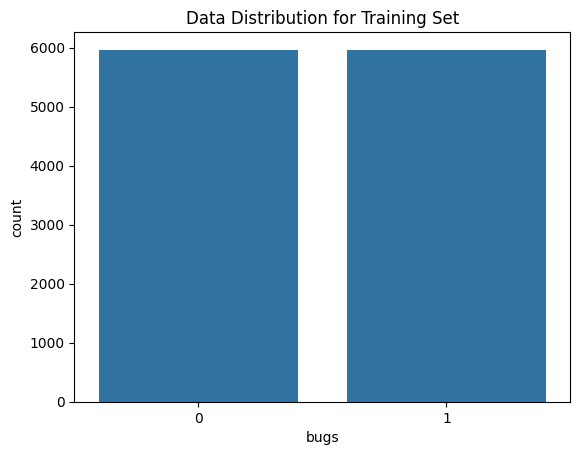

In [41]:
sns.countplot(x=y_train_smote, data=X_train_smote)
plt.title('Data Distribution for Training Set')
plt.show()

In [46]:
#1 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, classification_report

randomforest_classifier = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_leaf=2,
    criterion='gini',
    random_state=1
)

#train model
randomforest_classifier.fit(X_train, y_train)
val_predictions = randomforest_classifier.predict(X_test)

#metrics calculation
roc_auc = roc_auc_score(y_test, val_predictions)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_test, val_predictions)
print('validation accuracy : ', accuracy)

recall = recall_score(y_test, val_predictions)
print('validation recall : ', recall)

f1score = f1_score(y_test, val_predictions)
print('validation f1-score : ', f1score)

#classification report
print(classification_report(y_test, val_predictions))


Validation roc auc score:  0.5284144242803505
validation accuracy :  0.9383561643835616
validation recall :  0.058823529411764705
validation f1-score :  0.10810810810810811
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1504
           1       0.67      0.06      0.11       102

    accuracy                           0.94      1606
   macro avg       0.80      0.53      0.54      1606
weighted avg       0.92      0.94      0.91      1606



Validation roc auc score: 0.7362
Validation accuracy: 0.5735
Validation recall: 0.8333
Validation precision: 0.1129
Validation f1-score: 0.1988
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1504
           1       0.11      0.83      0.20       102

    accuracy                           0.57      1606
   macro avg       0.55      0.69      0.45      1606
weighted avg       0.92      0.57      0.68      1606



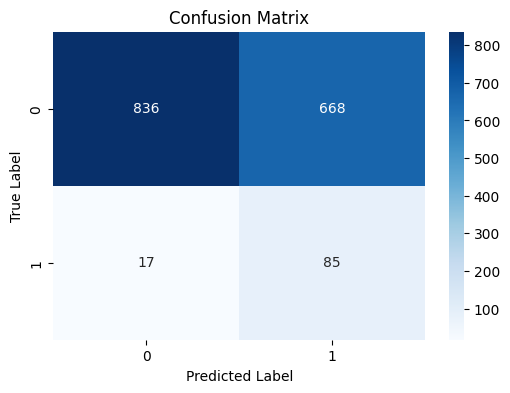

In [52]:
#handling using smote and adding weights in minority classfrom 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

smt = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

#computing class weights
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)))

#define model using random forest
randomforest_classifier = RandomForestClassifier(
    n_estimators=300,  
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight=class_weights,  
    criterion='gini',
    random_state=42,
    n_jobs=-1
)

#Training the model 
randomforest_classifier.fit(X_train_resampled, y_train_resampled)
val_probabilities = randomforest_classifier.predict_proba(X_test)[:, 1]
val_predictions = (val_probabilities > 0.3).astype(int)

# Evaluate model
roc_auc = roc_auc_score(y_test, val_probabilities)
accuracy = accuracy_score(y_test, val_predictions)
recall = recall_score(y_test, val_predictions)
precision = precision_score(y_test, val_predictions)
f1score = f1_score(y_test, val_predictions)

# Print metrics
print(f'Validation roc auc score: {roc_auc:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')
print(f'Validation recall: {recall:.4f}')
print(f'Validation precision: {precision:.4f}')
print(f'Validation f1-score: {f1score:.4f}')
print(classification_report(y_test, val_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [58]:
#handling using smote and adding weights in minority classfrom 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.utils.class_weight import compute_class_weight

# smt = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Define K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#computing class weights
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)))

#define model using random forest
randomforest_classifier = RandomForestClassifier(
    n_estimators=300,  
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight=class_weights,  
    criterion='gini',
    random_state=42,
    n_jobs=-1
)

# Perform K-Fold Cross Validation
auc_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
classification_reports = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Create training and validation subsets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Handle class imbalance using SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Train model
    randomforest_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Predictions
    val_probabilities = randomforest_classifier.predict_proba(X_val_fold)[:, 1]
    val_predictions = (val_probabilities > 0.3).astype(int)  # Adjusting threshold

    # Evaluate performance on current fold
    auc_scores.append(roc_auc_score(y_val_fold, val_probabilities))
    accuracy_scores.append(accuracy_score(y_val_fold, val_predictions))
    recall_scores.append(recall_score(y_val_fold, val_predictions))
    precision_scores.append(precision_score(y_val_fold, val_predictions))
    f1_scores.append(f1_score(y_val_fold, val_predictions))
    classification_reports.append(classification_report(y_val_fold, val_predictions))

# Print Average Scores Across Folds
print(f'Average ROC-AUC Score: {np.mean(auc_scores):.4f}')
print(f'Average Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Average Recall: {np.mean(recall_scores):.4f}')
print(f'Average Precision: {np.mean(precision_scores):.4f}')
print(f'Average F1-Score: {np.mean(f1_scores):.4f}')
print(f'Classification Score: {np.mean(classification_reports):.4f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# # Compute confusion matrix
# confussion_m = confusion_matrix(y_test, val_predictions)

# # Plot confusion matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(confussion_m, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()


Average ROC-AUC Score: 0.7157
Average Accuracy: 0.5871
Average Recall: 0.7457
Average Precision: 0.1071
Average F1-Score: 0.1873


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U326'), dtype('<U326')) -> None